In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')
import pvlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [175]:
forecast_weather = pd.read_csv('../../Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('../../Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [176]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [177]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).sum().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

In [178]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

In [179]:
reg = real_weather[real_weather['지점명'] =='순천']

In [180]:
eda_weather = reg.drop(['지점', '지점명'], axis=1)
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

In [181]:
eda_weather.set_index('일시', inplace=True)

In [182]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [183]:
solar_2.date = pd.to_datetime(solar_2.date)

In [184]:
solar_2.set_index('date', inplace=True)

In [185]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [186]:
y = solar_2.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [187]:
y.drop('hour', axis=1 , inplace=True)

In [188]:
x.drop(['위도','경도'], axis=1, inplace=True)

In [189]:
total = pd.concat([x, y], axis = 1)

In [190]:
total.interpolate()

,기온,풍속,풍향,습도,강수량,hour,month,year,value
2021-01-01 00:00:00,-2.3,3.8,290.0,81.0,0.0,0.0,1.0,2021.0,0.0
2021-01-01 01:00:00,-3.1,3.3,290.0,71.0,0.0,1.0,1.0,2021.0,0.0
2021-01-01 02:00:00,-3.7,3.6,290.0,73.0,0.0,2.0,1.0,2021.0,0.0
2021-01-01 03:00:00,-4.2,3.1,270.0,76.0,0.0,3.0,1.0,2021.0,0.0
2021-01-01 04:00:00,-4.2,2.4,270.0,76.0,0.0,4.0,1.0,2021.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,13.9,3.0,290.0,70.0,0.0,19.0,4.0,2022.0,144.0
2022-04-30 20:00:00,12.9,2.2,290.0,78.0,0.0,20.0,4.0,2022.0,0.0
2022-04-30 21:00:00,12.5,2.5,290.0,78.0,0.0,21.0,4.0,2022.0,0.0
2022-04-30 22:00:00,11.9,2.7,290.0,82.0,0.0,22.0,4.0,2022.0,0.0


In [191]:
complete_date_rng = pd.date_range(start='2021-01-01', end='2022-04-30', freq='H')

# 누락된 시간 찾기
missing_dates = complete_date_rng.difference(total.index)

In [192]:
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [193]:
total_eda = total[(total.index>='2021-09-28') | (total.index <= '2021-09-22')]

In [194]:
total_eda_2 = total_eda[(total_eda.index <= '2022-01-14') | (total_eda.index >= '2022-01-17')]

In [195]:
date_counts = total_eda_2.resample('D').count()

In [196]:
date_counts

,기온,풍속,풍향,습도,강수량,hour,month,year,value
2021-01-01,24,24,24,24,24,24,24,24,24
2021-01-02,24,24,24,24,24,24,24,24,24
2021-01-03,24,24,24,24,24,24,24,24,24
2021-01-04,24,24,24,24,24,24,24,24,24
2021-01-05,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...
2022-04-26,24,24,24,24,24,24,24,24,24
2022-04-27,24,24,24,24,24,24,24,24,24
2022-04-28,24,24,24,24,24,24,24,24,24
2022-04-29,24,24,24,24,24,24,24,24,24


In [197]:
extra_hourly_data = date_counts[date_counts['month'] < 24]

extra_hourly_data

,기온,풍속,풍향,습도,강수량,hour,month,year,value
2021-09-22,1,1,1,1,1,1,1,1,1
2021-09-23,0,0,0,0,0,0,0,0,0
2021-09-24,0,0,0,0,0,0,0,0,0
2021-09-25,0,0,0,0,0,0,0,0,0
2021-09-26,0,0,0,0,0,0,0,0,0
2021-09-27,0,0,0,0,0,0,0,0,0
2022-01-01,23,23,23,23,23,23,23,23,24
2022-01-14,1,1,1,1,1,1,1,1,1
2022-01-15,0,0,0,0,0,0,0,0,0
2022-01-16,0,0,0,0,0,0,0,0,0


In [198]:
total_eda_2 = total_eda_2[total_eda_2.index != '2022-01-14']
total_eda_2 = total_eda_2[total_eda_2.index != '2021-09-22']

In [199]:
total_eda_2.interpolate(inplace=True, method='linear')

In [200]:
total_eda_2

,기온,풍속,풍향,습도,강수량,hour,month,year,value
2021-01-01 00:00:00,-2.3,3.8,290.0,81.0,0.0,0.0,1.0,2021.0,0.0
2021-01-01 01:00:00,-3.1,3.3,290.0,71.0,0.0,1.0,1.0,2021.0,0.0
2021-01-01 02:00:00,-3.7,3.6,290.0,73.0,0.0,2.0,1.0,2021.0,0.0
2021-01-01 03:00:00,-4.2,3.1,270.0,76.0,0.0,3.0,1.0,2021.0,0.0
2021-01-01 04:00:00,-4.2,2.4,270.0,76.0,0.0,4.0,1.0,2021.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,13.9,3.0,290.0,70.0,0.0,19.0,4.0,2022.0,144.0
2022-04-30 20:00:00,12.9,2.2,290.0,78.0,0.0,20.0,4.0,2022.0,0.0
2022-04-30 21:00:00,12.5,2.5,290.0,78.0,0.0,21.0,4.0,2022.0,0.0
2022-04-30 22:00:00,11.9,2.7,290.0,82.0,0.0,22.0,4.0,2022.0,0.0


In [201]:
def clear_sky_model_pred(longitude, latitude, capacity, weather):
    """
    input :
        longitude : 경도
        latitude : 위도
        capacity : 용량(단위 : w)
        weather : 날씨 데이터 (index가 날짜인 데이터)
    output :
        cs : ghi, dni, dhi
        generation : 발전량
    """
    location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')
    start_date = weather.index.min()
    end_date = weather.index.max()

    # 시간대가 Asia/Seoul로 설정되어 있는지 확인하고, 아니라면 설정한다.
    if weather.index.tz is None or weather.index.tz.zone != 'Asia/Seoul':
        weather = weather.tz_localize('Asia/Seoul')

    times = pd.date_range(start=start_date, end=end_date, freq='1H', tz='Asia/Seoul')
    solpos = location.get_solarposition(times=times)
    dni_extra = pvlib.irradiance.get_extra_radiation(times)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(location.altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
    tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

    solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
    cs = location.get_clearsky(times, model='simplified_solis')
    
    # cs의 시간대를 None으로 설정
    cs = cs.tz_localize(None)

    system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                    module_parameters={'pdc0': capacity, 'gamma_pdc': -0.004}, 
                                    inverter_parameters={'pdc0': capacity},
                                    modules_per_string=1, strings_per_inverter=1,
                                    temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
    mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

    mc.run_model(pd.concat([solis_clearsky, weather], axis=1))

    return cs, pd.DataFrame(mc.results.ac)

In [202]:
latitude, longitude = reg[['위도', '경도']].iloc[0]

In [203]:
latitude, longitude

(35.0204, 127.3694)

In [204]:
weather_input = total_eda_2.drop(['month', 'year', 'hour', 'value'], axis=1)

In [205]:
radi, _ = clear_sky_model_pred(longitude, latitude, 1000, weather_input)

In [206]:
radi

,ghi,dni,dhi
2021-01-01 00:00:00,0.000000,0.000000,0.00000
2021-01-01 01:00:00,0.000000,0.000000,0.00000
2021-01-01 02:00:00,0.000000,0.000000,0.00000
2021-01-01 03:00:00,0.000000,0.000000,0.00000
2021-01-01 04:00:00,0.000000,0.000000,0.00000
...,...,...,...
2022-04-30 19:00:00,15.257757,126.590259,19.22342
2022-04-30 20:00:00,0.000000,0.000000,0.00000
2022-04-30 21:00:00,0.000000,0.000000,0.00000
2022-04-30 22:00:00,0.000000,0.000000,0.00000


In [207]:
total_df = pd.concat([total_eda_2, radi], axis=1)

In [208]:
total_df.interpolate(inplace=True, method='linear')

In [209]:
y = total_df.value / 5
x = total_df.drop('value', axis=1)

In [210]:
slice = 455 * 24

In [211]:
x_train = x.iloc[:slice]
x_test = x.iloc[slice:]
y_train = y.iloc[:slice]
y_test = y.iloc[slice:]

In [212]:
from sklearn.preprocessing import MinMaxScaler

In [213]:
sc = MinMaxScaler()

In [214]:
sc.fit(y_train.values.reshape(-1,1))

MinMaxScaler()

In [215]:
df_y = pd.DataFrame(y)

In [216]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [217]:
df_y['weekday'] = df_y.index.weekday
df_y['hour'] = df_y.index.hour
df_y['month'] = df_y.index.month

In [218]:
df_y

,value,weekday,hour,month
2021-01-01 00:00:00,0.0,4,0,1
2021-01-01 01:00:00,0.0,4,1,1
2021-01-01 02:00:00,0.0,4,2,1
2021-01-01 03:00:00,0.0,4,3,1
2021-01-01 04:00:00,0.0,4,4,1
...,...,...,...,...
2022-04-30 19:00:00,28.8,5,19,4
2022-04-30 20:00:00,0.0,5,20,4
2022-04-30 21:00:00,0.0,5,21,4
2022-04-30 22:00:00,0.0,5,22,4


In [219]:
avg = df_y.groupby(['month','weekday','hour']).mean().unstack().values

In [220]:
pred_df = pd.read_csv('./stacking_result.csv')

In [221]:
inverse_df = pd.DataFrame()

In [222]:
for i in pred_df.columns:
    inverse_df[i] = sc.inverse_transform(pred_df[i].values.reshape(-1,1)).flatten()

In [223]:
inverse_df.index = y_test.index

In [224]:
inverse_df['hour'] = inverse_df.index.hour
inverse_df['weekday'] = inverse_df.index.weekday
inverse_df['month'] = inverse_df.index.month

In [225]:
inverse_df.groupby(['month', 'weekday', 'hour']).mean().unstack(level=1)

stacking                                                  \
weekday              0           1           2           3           4   
month hour                                                               
4     0       0.761963    3.851603    0.788186    0.629256    0.757227   
      1       0.737361    1.380416    0.755537    0.604047    0.708180   
      2       0.854493    1.930074    0.622933    0.612022    0.758460   
      3       0.762965    1.451147    0.689664    0.612922    0.748727   
      4       0.560296    1.429724    0.667735    0.609516    0.738596   
      5       0.744328    1.417994    0.856571    0.615086    0.801404   
      6       4.189786    0.761851    0.590285    0.578163    1.125295   
      7      19.898609   13.672277   24.778077   12.158113   12.373322   
      8     142.940914  108.732514  195.261544  118.599325  125.768827   
      9     308.972541  310.357182  362.841137  238.365303  252.866272   
      10    443.047747  444.470799  510.697275  447.002793  412.079993   
      11    488.917609  440.808784  478.220095  525.233726  530.217454   
      12    571.816543  492.870907  642.049739  459.483964  565.440695   
      13    670.338145  554.158014  546.110739  478.418765  533.115542   
      14    612.355879  531.980262  492.943975  398.258504  596.746960   
      15    549.412073  505.433577  464.402459  421.841031  497.824944   
      16    390.640601  367.566702  363.878208  328.961369  353.119652   
      17    234.852257  236.246545  231.449311  201.310295  222.849246   
      18     86.931923   86.060732   79.533727   93.460116   88.029509   
      19      5.005184   14.316227    7.671036   17.870077   18.522630   
      20      1.527384    1.653815    0.619368    1.523292    0.934313   
      21      0.822487    4.792435    0.430186    0.900193    1.041448   
      22      0.885505    1.811582    0.702516    1.084249    0.824744   
      23      0.829480    1.569391    0.331083    0.720973    0.851379   

                                        weight                          ...  \
weekday              5           6           0           1           2  ...   
month hour                                                              ...   
4     0       1.422789    0.766275   -0.387766    2.696178   -0.115724  ...   
      1       1.399301    0.788888   -0.411426    0.104046   -0.149731  ...   
      2       1.391976    0.828133   -0.119967    0.776787   -0.539946  ...   
      3       1.402115    0.701831   -0.390762    0.350944   -0.457555  ...   
      4       1.400065    0.843142   -0.588734    0.322203   -0.486234  ...   
      5       1.390696    0.757565   -0.409290    0.299282   -0.103521  ...   
      6       1.515768    0.529377    3.098214   -0.349053   -0.422798  ...   
      7      18.920412   12.113380   18.075104   12.315432   23.172882  ...   
      8     102.620145  146.311266  143.589808  108.610777  194.633982  ...   
      9     345.307868  370.529030  311.312934  311.227760  365.366774  ...   
      10    417.065826  536.273531  444.952100  445.525803  513.282091  ...   
      11    544.996917  647.915929  490.052126  441.143226  477.692141  ...   
      12    582.482753  692.289670  573.462416  493.865540  644.769716  ...   
      13    614.779554  687.962521  673.328377  556.666794  548.050142  ...   
      14    610.776012  655.002556  614.440186  533.435021  494.006032  ...   
      15    586.154594  531.165823  552.794118  507.785290  465.420296  ...   
      16    475.245705  455.076302  392.300260  368.482600  364.982723  ...   
      17    225.282492  281.410150  234.161246  236.738400  230.814287  ...   
      18     95.258122  107.050835   86.594582   85.504709   78.620825  ...   
      19     14.528970    8.427655    3.718772   13.315608    6.880253  ...   
      20      2.319234    1.564988    0.258248    0.455309   -0.387895  ...   
      21      1.822600    1.137660   -0.418911    3.643460   -0.894743  ...   
      22      1.562485    0.979631   -0.

In [226]:
inverse_df.columns

Index(['stacking', 'weight', 'rf', 'lg', 'ann', 'lstm', 'real', 'hour',
       'weekday', 'month'],
      dtype='object')

<Axes: >

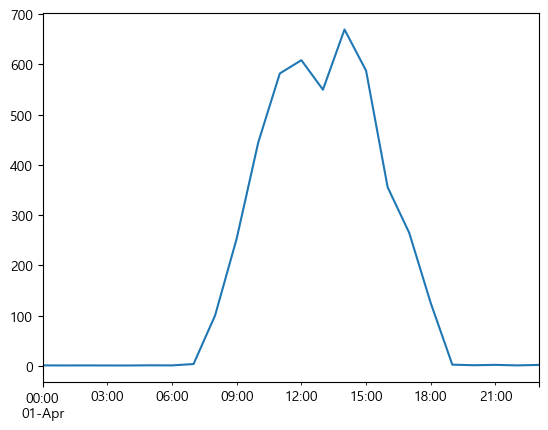

In [227]:
inverse_df['stacking'][:24].plot()

In [228]:
stacking = inverse_df.groupby(['month', 'weekday', 'hour']).mean().unstack(level=1).values[:,:7]
weight = inverse_df.groupby(['month', 'weekday', 'hour']).mean().unstack(level=1).values[:,7:14]
rf = inverse_df.groupby(['month', 'weekday', 'hour']).mean().unstack(level=1).values[:,14:21]
lg = inverse_df.groupby(['month', 'weekday', 'hour']).mean().unstack(level=1).values[:,21:28]
lstm = inverse_df.groupby(['month', 'weekday', 'hour']).mean().unstack(level=1).values[:,28:35]


In [229]:
inverse_df

,stacking,weight,rf,lg,ann,lstm,real,hour,weekday,month
2022-04-01 00:00:00,0.950999,-0.271540,0.001964,2.164807,-3.783523,-0.177984,0.0,0,4,4
2022-04-01 01:00:00,0.800624,-0.424374,0.001964,2.164807,-3.779316,-0.333345,0.0,1,4,4
2022-04-01 02:00:00,0.890751,-0.332697,0.001964,2.164807,-3.773338,-0.240085,0.0,2,4,4
2022-04-01 03:00:00,0.773781,-0.451575,0.001964,2.164807,-3.769618,-0.360925,0.0,3,4,4
2022-04-01 04:00:00,0.754609,-0.470985,0.001964,2.164807,-3.760715,-0.380591,0.0,4,4,4
...,...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,22.277681,22.067747,16.305085,1.406001,30.083692,21.613547,28.8,19,5,4
2022-04-30 20:00:00,1.840796,0.759017,0.245876,1.406001,6.361076,0.887814,0.0,20,5,4
2022-04-30 21:00:00,3.002235,1.939251,0.222746,1.406001,6.358741,2.089430,0.0,21,5,4
2022-04-30 22:00:00,1.709894,0.625640,0.222746,1.406001,6.378804,0.753966,0.0,22,5,4


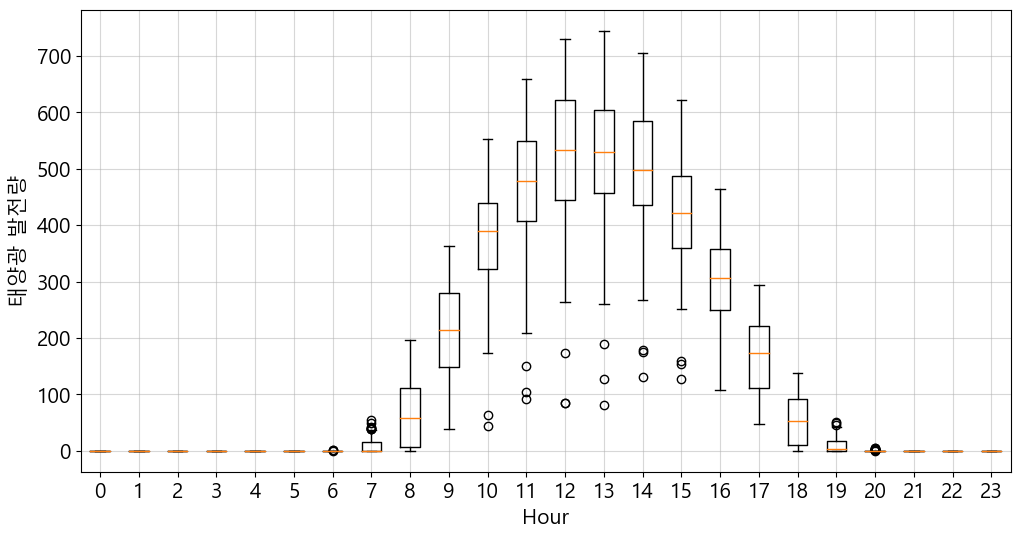

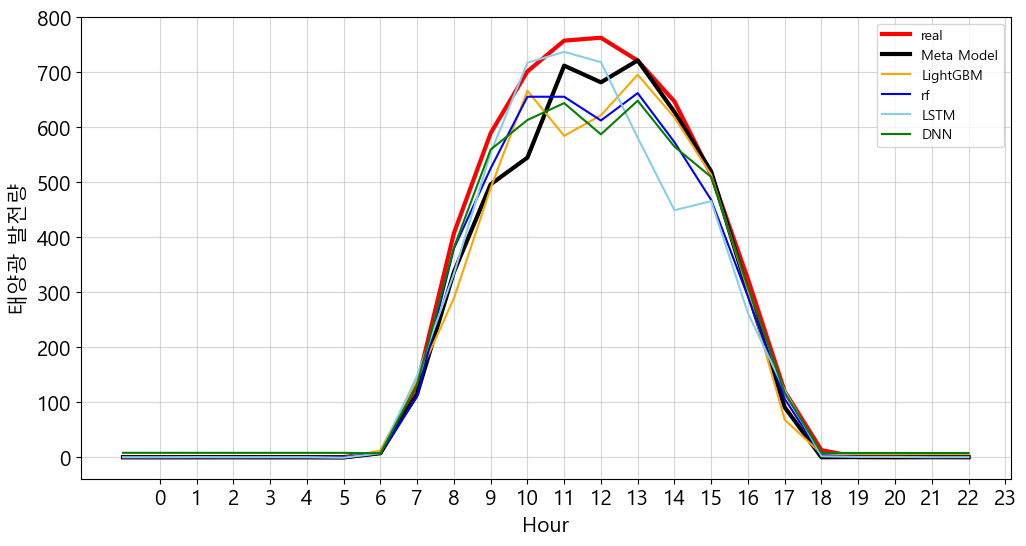

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# X, Y, average_values, std_values 배열이 이미 정의되었다고 가정합니다.

# 시간에 따른 분산을 box plot으로 표현
plt.figure(figsize=(12, 6))
plt.boxplot(avg)  # 이상치를 표시하지 않음
plt.xlabel('Hour', fontsize = 15)
plt.ylabel('태양광 발전량', fontsize = 15)
plt.xticks(range(1, 25), range(24), fontsize = 15)  # 0-23시를 x축에 표시
plt.yticks(fontsize = 15)
plt.grid(True, alpha = 0.5)
plt.show()

In [377]:
inverse_df

,stacking,weight,rf,lg,ann,lstm,real,hour,weekday,month
2022-04-01 00:00:00,0.950999,-0.271540,0.001964,2.164807,-3.783523,-0.177984,0.0,0,4,4
2022-04-01 01:00:00,0.800624,-0.424374,0.001964,2.164807,-3.779316,-0.333345,0.0,1,4,4
2022-04-01 02:00:00,0.890751,-0.332697,0.001964,2.164807,-3.773338,-0.240085,0.0,2,4,4
2022-04-01 03:00:00,0.773781,-0.451575,0.001964,2.164807,-3.769618,-0.360925,0.0,3,4,4
2022-04-01 04:00:00,0.754609,-0.470985,0.001964,2.164807,-3.760715,-0.380591,0.0,4,4,4
...,...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,22.277681,22.067747,16.305085,1.406001,30.083692,21.613547,28.8,19,5,4
2022-04-30 20:00:00,1.840796,0.759017,0.245876,1.406001,6.361076,0.887814,0.0,20,5,4
2022-04-30 21:00:00,3.002235,1.939251,0.222746,1.406001,6.358741,2.089430,0.0,21,5,4
2022-04-30 22:00:00,1.709894,0.625640,0.222746,1.406001,6.378804,0.753966,0.0,22,5,4


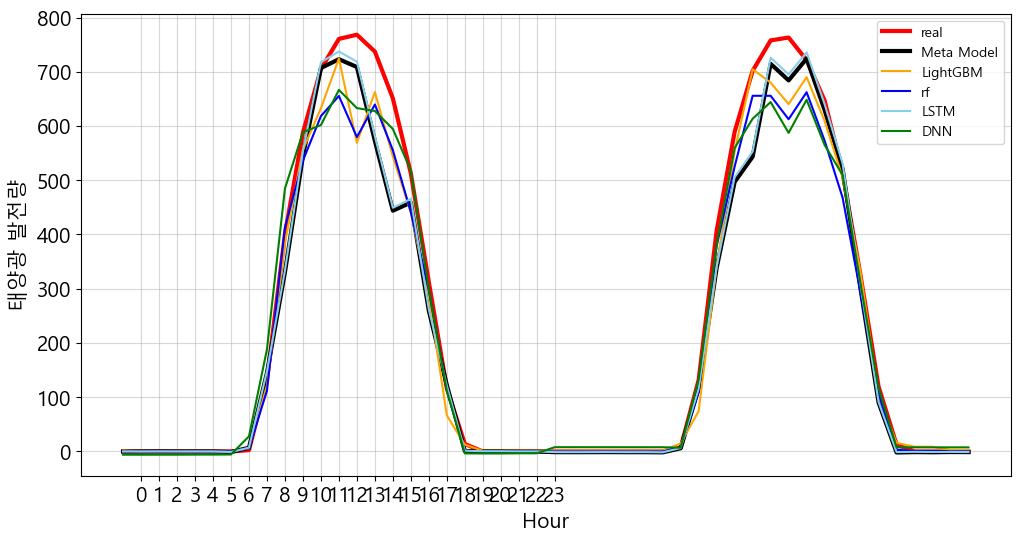

In [238]:
start = 48
end = 96

plt.figure(figsize=(12, 6))
plt.plot(inverse_df['real'][start:end].values, color = 'r', label = 'real', linewidth = 3)
plt.plot(inverse_df['weight'][start:end].values, color = 'k', label = 'Meta Model', linewidth = 3)
plt.plot(inverse_df['lg'][start:end].values, color = 'orange', label = 'LightGBM')
plt.plot(inverse_df['rf'][start:end].values, color = 'blue', label = 'rf')
plt.plot(inverse_df['lstm'][start:end].values, color = 'skyblue', label = 'LSTM')
plt.plot(inverse_df['ann'][start:end].values, color = 'g', label = 'DNN')
plt.xlabel('Hour', fontsize = 15)
plt.ylabel('태양광 발전량', fontsize = 15)
plt.xticks(range(1, 25), range(24), fontsize = 15)  # 0-23시를 x축에 표시
plt.yticks(fontsize = 15)
plt.grid(True, alpha = 0.5)
plt.legend()
plt.show()

In [236]:
inverse_df

,stacking,weight,rf,lg,ann,lstm,real,hour,weekday,month
2022-04-01 00:00:00,0.950999,-0.271540,0.001964,2.164807,-3.783523,-0.177984,0.0,0,4,4
2022-04-01 01:00:00,0.800624,-0.424374,0.001964,2.164807,-3.779316,-0.333345,0.0,1,4,4
2022-04-01 02:00:00,0.890751,-0.332697,0.001964,2.164807,-3.773338,-0.240085,0.0,2,4,4
2022-04-01 03:00:00,0.773781,-0.451575,0.001964,2.164807,-3.769618,-0.360925,0.0,3,4,4
2022-04-01 04:00:00,0.754609,-0.470985,0.001964,2.164807,-3.760715,-0.380591,0.0,4,4,4
...,...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,22.277681,22.067747,16.305085,1.406001,30.083692,21.613547,28.8,19,5,4
2022-04-30 20:00:00,1.840796,0.759017,0.245876,1.406001,6.361076,0.887814,0.0,20,5,4
2022-04-30 21:00:00,3.002235,1.939251,0.222746,1.406001,6.358741,2.089430,0.0,21,5,4
2022-04-30 22:00:00,1.709894,0.625640,0.222746,1.406001,6.378804,0.753966,0.0,22,5,4


In [239]:
from math import *
import random
import sys

In [240]:
class Particle:
    def __init__(self, max_iter, initial_position=None):
        if initial_position:  # If an initial position is provided
            self.position = initial_position.copy()
        else:
            self.position = [0.0]*4  # particle current position
        self.velocity = [random.uniform(-1, 1) for _ in range(4)]  # particle current velocity
        self.best_position = [0.0]*4  # particle best position
        self.fitness = sys.maxsize   # particle fitness
        self.best_fitness = sys.maxsize  # particle best fitness
        self.iteration = 0  # iteration count
        self.max_iter = max_iter

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.position)
        if self.fitness < self.best_fitness:
            self.best_position = self.position.copy()
            self.best_fitness = self.fitness

    def update_velocity(self, global_best_position):
        w_min = 0.5
        w_max = 1
        self.iteration += 1
        w = w_max - ((w_max - w_min) * self.iteration / self.max_iter)
        c1 = 1
        c2 = 1.5
        for i in range(len(self.position)):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = c1 * r1 * (self.best_position[i] - self.position[i])
            social_velocity = c2 * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = w * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]
            if self.position[i] < bounds[i][0]:
                self.position[i] = bounds[i][0]
            elif self.position[i] > bounds[i][1]:
                self.position[i] = bounds[i][1]

class PSO:
    def __init__(self, fitness_function, bounds, num_particles, max_iter, initial_positions=None):
        self.fitness_func = fitness_function
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.global_best_position = [0.0]*4
        self.global_best_fitness = sys.maxsize
        if initial_positions:
            self.swarm = [Particle(max_iter, initial_position=pos) for pos in initial_positions]
        else:
            self.swarm = [Particle(max_iter) for _ in range(num_particles)]

    def run_result(self):
        for i in range(self.max_iter):
            for j in range(self.num_particles):
                self.swarm[j].evaluate_fitness(self.fitness_func)
                if self.swarm[j].fitness < self.global_best_fitness:
                    self.global_best_position = self.swarm[j].position.copy()
                    self.global_best_fitness = self.swarm[j].fitness
            for j in range(self.num_particles):
                self.swarm[j].update_velocity(self.global_best_position)
                self.swarm[j].update_position(self.bounds)
        return self.global_best_position, self.global_best_fitness

In [241]:
def fitness_function(x, train_predictions_array, y_train):
    fitness = 0
    for i in range(4):
        fitness += train_predictions_array[:,i] * x[i]
    difference = y_train - fitness
    return np.sum(difference**2)

In [242]:
weights = np.array([3 if 11 <= i <= 13 else 1 for i in range(24)])

def weighted_fitness_function(x, train_predictions_array, y_train, weights):
    fitness = 0
    for i in range(4):
        fitness += train_predictions_array[:,i] * x[i]
    difference = y_train - fitness
    num_repeats = len(difference) // len(weights)
    extended_weights = np.tile(weights, num_repeats)
    weighted_difference = difference * extended_weights  # Corrected the weights shape here
    return np.sum(weighted_difference**2)


In [286]:
bound = [(-0.4,0.4) for _ in range(4)]

In [287]:
pso_result = PSO(lambda x : weighted_fitness_function(x, inverse_df[['rf', 'lg', 'ann', 'lstm']].values, inverse_df['real'].values, weights),
                 bounds=bound,
                 num_particles=100,
                 max_iter=200)


In [288]:
best_position, best_fitness = pso_result.run_result()

In [289]:
best_position

[0.4, 0.4, 0.33523105955287374, -0.05373477507031102]

In [290]:
aa = np.dot(inverse_df[['rf', 'lg', 'ann', 'lstm']].values, best_position)

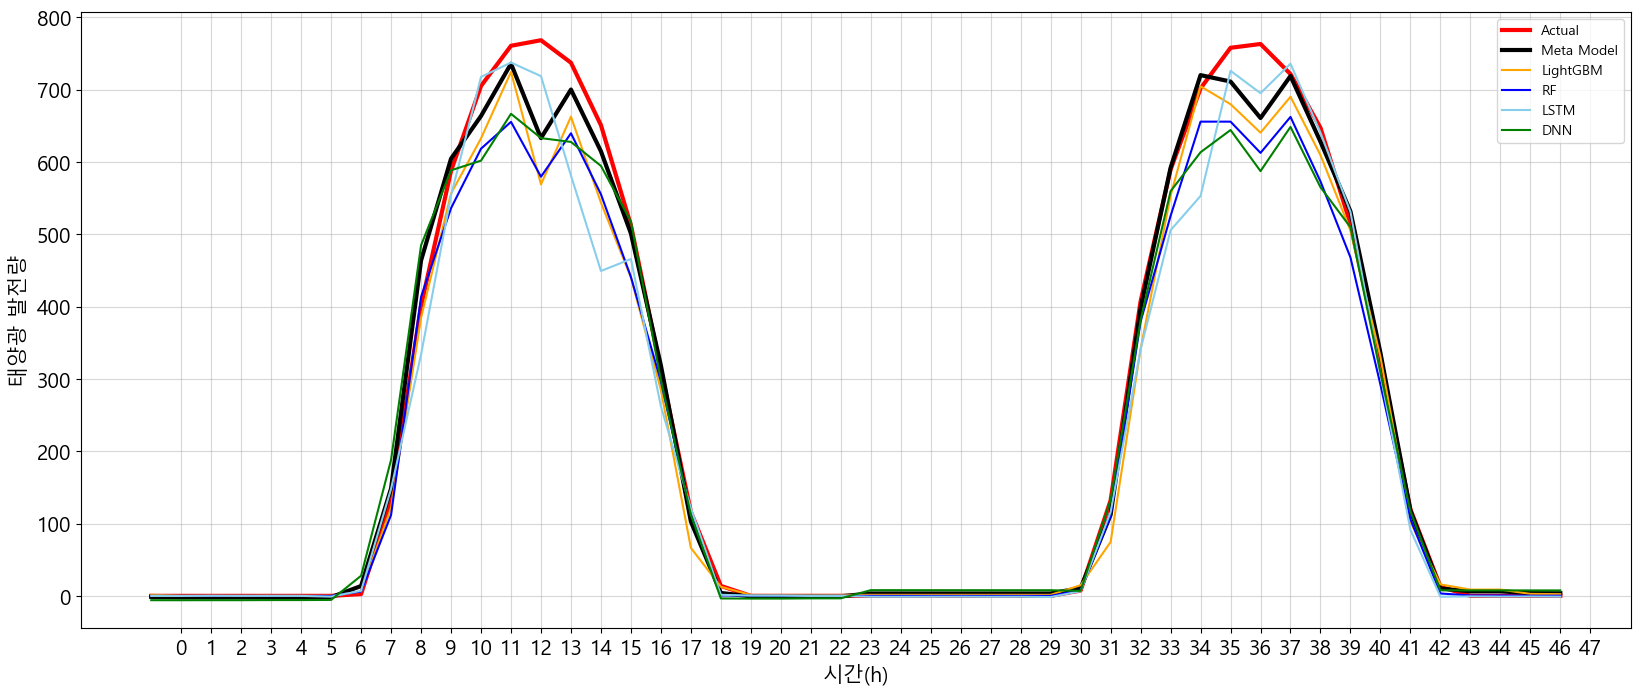

In [392]:
start = 48
end = 96

plt.figure(figsize=(20, 8))
plt.plot(inverse_df['real'][start:end].values, color = 'r', label = 'Actual', linewidth = 3)
plt.plot(aa[start:end], color = 'k', label = 'Meta Model', linewidth = 3)
plt.plot(inverse_df['lg'][start:end].values, color = 'orange', label = 'LightGBM')
plt.plot(inverse_df['rf'][start:end].values, color = 'blue', label = 'RF')
plt.plot(inverse_df['lstm'][start:end].values, color = 'skyblue', label = 'LSTM')
plt.plot(inverse_df['ann'][start:end].values, color = 'g', label = 'DNN')
plt.xlabel('시간(h)', fontsize = 15)
plt.ylabel('태양광 발전량', fontsize = 15)
plt.xticks(range(1, end-start+1), range(end-start), fontsize = 15)  # 0-23시를 x축에 표시
plt.yticks(fontsize = 15)
plt.grid(True, alpha = 0.5)
plt.legend()
plt.show()

In [303]:
inverse_df.between_time('11:00', '13:00')

,stacking,weight,rf,lg,ann,lstm,real,hour,weekday,month
2022-04-01 11:00:00,581.798569,582.042931,642.139421,658.399611,574.405741,590.209512,744.56,11,4,4
2022-04-01 12:00:00,608.147945,609.215335,640.912193,648.934815,578.082226,617.392384,804.32,12,4,4
2022-04-01 13:00:00,549.514878,550.309570,610.820120,613.792231,566.891495,557.444206,744.88,13,4,4
2022-04-02 11:00:00,710.908557,712.984342,658.067941,666.692346,541.084310,722.454977,727.44,11,5,4
2022-04-02 12:00:00,710.898283,715.665006,625.335558,584.664815,549.395695,722.690450,750.40,12,5,4
...,...,...,...,...,...,...,...,...,...,...
2022-04-29 12:00:00,128.203079,128.380034,313.075618,250.265727,323.785951,125.917588,517.68,12,4,4
2022-04-29 13:00:00,129.642580,128.378687,333.607729,293.670364,307.695522,126.916257,637.28,13,4,4
2022-04-30 11:00:00,570.831609,573.844331,427.501225,459.543405,496.669591,584.559961,442.16,11,5,4
2022-04-30 12:00:00,600.135553,602.979384,448.298374,497.403940,545.676466,615.349892,460.72,12,5,4


In [307]:
in_df = inverse_df.copy()
in_df['weight_linear'] = aa

In [333]:
filter_df = in_df.between_time('08:00', '17:00')

In [345]:
filter_df.index

DatetimeIndex(['2022-04-01 08:00:00', '2022-04-01 09:00:00',
               '2022-04-01 10:00:00', '2022-04-01 11:00:00',
               '2022-04-01 12:00:00', '2022-04-01 13:00:00',
               '2022-04-01 14:00:00', '2022-04-01 15:00:00',
               '2022-04-01 16:00:00', '2022-04-01 17:00:00',
               ...
               '2022-04-30 08:00:00', '2022-04-30 09:00:00',
               '2022-04-30 10:00:00', '2022-04-30 11:00:00',
               '2022-04-30 12:00:00', '2022-04-30 13:00:00',
               '2022-04-30 14:00:00', '2022-04-30 15:00:00',
               '2022-04-30 16:00:00', '2022-04-30 17:00:00'],
              dtype='datetime64[ns]', length=300, freq=None)

In [360]:
time_labels = [f"{hour:02d}시" for hour in range(8, 18)] * 2

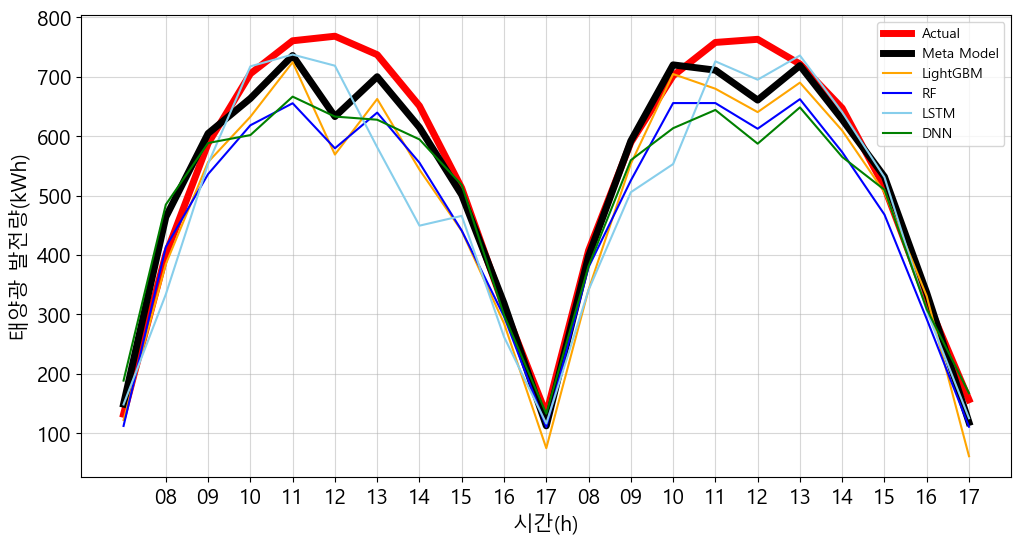

In [376]:
start = 20
end = 41


time_labels = [f"{hour:02d}" for hour in range(8, 18)] * 2

plt.figure(figsize=(12, 6))
plt.plot(filter_df['real'][start:end].values, color = 'r', label = 'Actual', linewidth = 5)
plt.plot(filter_df['weight_linear'][start:end].values, color = 'k', label = 'Meta Model', linewidth = 5)
plt.plot(filter_df['lg'][start:end].values, color = 'orange', label = 'LightGBM')
plt.plot(filter_df['rf'][start:end].values, color = 'blue', label = 'RF')
plt.plot(filter_df['lstm'][start:end].values, color = 'skyblue', label = 'LSTM')
plt.plot(filter_df['ann'][start:end].values, color = 'g', label = 'DNN')
plt.xlabel('시간(h)', fontsize = 15)
plt.ylabel('태양광 발전량(kWh)', fontsize = 15)
plt.xticks(range(1, end-start), time_labels, fontsize = 15)  # 0-23시를 x축에 표시
plt.yticks(fontsize = 15)
plt.grid(True, alpha = 0.5)
plt.legend()
plt.show()